# Latent Semantic Analysis (LSA)
Traduccion: Analisis semantico latente.

Usos: (historia no, ver las notas)

* Comparar documentos en espacios de baja dimension.

* Encontrar similaridades en documentos
* Analizar asociaciones de palabras en un "corpus".

La idea detras de LSA es basada en factorizacion de matrices: SVD.

La matriz de datos $X$ es tipicamente una "term-ducment matrix" (la transpuesta de la matriz en el ejemplo de la clase anterior).

* las filas representan palabras (terms) en el vocabulario
* Las columnas "documentos"
* $x_{ij}$ representa los pesos calculados con la palabra $i$ del documento $j$.

Los valores de $x_{ij}$ estan relacionados a la palabra $i$ del documento $j$. Tipicamente se usa el
TF-IDF de forma que

$$x_{ij} = \textrm{tf-idf}(ij) $$
donde $i$ es la palabra en el documento $j$.

Recordamos el SVD del curso de ML. Digamos que
$X \in \mathbb{R}^{m \times n}$ de acuerdo al teorema SVD (Singular Value Decomposition)

$$X = U \Sigma V^T \quad \quad \text{donde} \quad \quad   U \in \mathbb{R}^{m \times m} \; , \; \Sigma \in \mathbb{R}^{m \times n}  \; , \; V \in \mathbb{R}^{n \times n}$$










Sabemos que las columnas de $V$ son autovectores de la matriz $X^T X$ (normalizados), las columnas de $U$ son autovectores de la matriz $X X^T$ (normalizados) y la matriz $\Sigma$ es diagonal con valores singulares $\sigma_i$ a lo largo de la diagonal. El valor singular $\sigma_i= \sqrt{\lambda_i}$ donde $\lambda_i$ es un autovalor de $X^T X$ (que es positivo o 0.




Podemos hacer muchas cosas con esto. En particular
Tenemos $\sigma_1 \ge \sigma_2 \ge \cdots \sigma_r \ge \sigma_{r+1} \cdots \ge \sigma_{p} $. Es decir a partir de  donde $p = \min \{ m, n \}$. La idea es que existe un umbral (threshold) tal que a partir de $r$,
$\sigma_q \approx 0 $, $q>r$

1. Reducir el numero de datos (numero de filas).
Como se hace?
De la matriz $V$ se truncan todos las columnas $r+1, r+2, \cdots n$, y quda una matriz truncada $V_r$. Luego se projecta esta pmatriz mediante los valores singulares

$$X_r = \Sigma_r V_r^T \quad \quad \text{donde} \quad \quad X_r \in \mathbb{R}^{r \times n} \; , \; \Sigma \in \mathbb{R}^{n \times r} \; , \; V_r \in \mathbb{R}^{n \times r} \quad r \ll m $$






2. Reducir la dimension de los datos (numero de columnas).

$$X_r = X V_r \quad \quad \text{donde} \quad \quad X_r \in \mathbb{R}^{m \times r} \; , \; X \in \mathbb{R}^{m \times n} \;  , \; V_r \in \mathbb{R}^{n \times r} \quad r \ll n $$

Este es el tipico problema de PCA (Principal Component Analysis).



3. Reducir ambos (filas y columnas ) (datos y dimensions).

$$X_r = U_r \Sigma_r V_r^T \quad \quad \text{donde} \quad \quad X_r \in \mathbb{R}^{r \times r} \; , \, U_r \in \mathbb{R}^{m \times r} \; , \; \Sigma_r \in \mathbb{R}^{r \times r} \; , \; V_r \in \mathbb{R}^{n \times r} $$



In LSA se usa el ultimo.

El flujo (workflow) de LSA es:

* Creamos la matriz de datos $X$ (con el tf-idf, ver arriba).
* Hacemos descomposicion SVD, de $X$ donde se obtienen tres matrices $U, \Sigma, V$

* Se escoge el umbral a partir del cual se eliliminan dimensiones. Digamos el indice $r$.

* Use las matrices reducidas.
    * Representacion de documentos:
    $$D_r = U_r \Sigma_r  $$
    * Representacion de terminos
    $$T_r = V_r \Sigma_r^T $$

    * Calcule la similidad semantica. Por ejemplo usando la distancia de coseno entre documentos y terminos.

Comentario: SVD es costoso. Matrices muy grandes implican un costo elevado. El costo para una matriz de $m \times n$ es del orden $\mathcal{O}(m n^2) $



## Co-corrent Statistics.
Se construye el diccionario del corpus (cuerpo).
se define una ventana de contexto de tamanho $n$.
Se construye una matriz con todas las palabras y unos indices que determinanos a continuacion. Veamos, con un ejemplo, como se construye esta matriz.

"I like orange juice"

"I like to drink orange juice"

Construimos el vocabulario:
"I", "like", "orange", "juice", "to", "drink". Vamos
a usar una ventana contextual $n=1$. Esto quiere decir que **contamos** para cada palabra la ocurrencia de cada vecina en una ventana desde -1 hasta 1 (una antes hasta una despues).

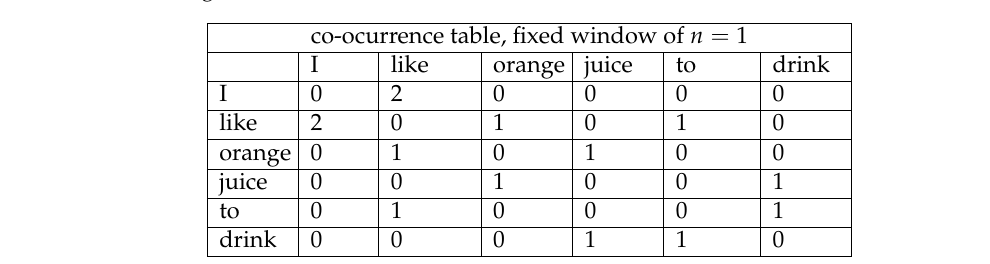

Esta matriz es simetrica por que $w_i$ este cerca ($n$ lugares) de $w_j$ es lo mismo que $w_j$ este cerca $n$ lugares) de $w_i$.

Puede ser que definamos una distancia uni-direccional. Cada palabra mira hacia adelante (no hacia atras) o vice-versa cada palabra mira hacia atras (no hacia adelante). Se pierde la simtria.

Con esto se pude hacer un diagrama de flujo.


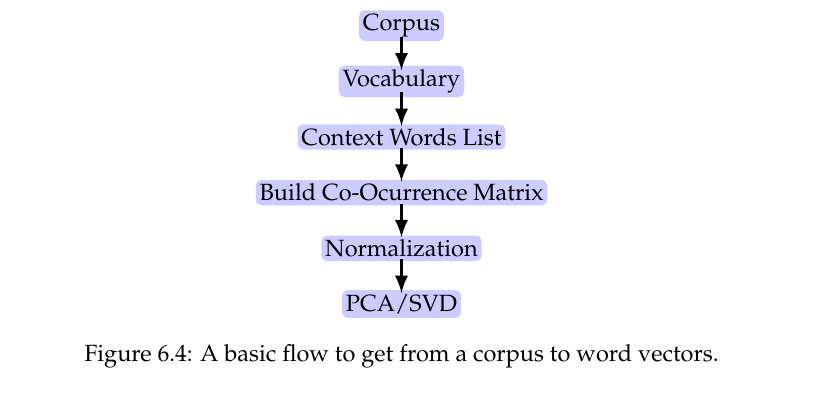

# Word Embeddings:
Esto consiste no solo en mapear palabras a vectores en $\mathbb{R}^n$ sino que estos vectores tienen un significado que ayudan a interpretar textos y predecir, la proxima palabra. Esta tecnica es **self-supervised**
(auto-supervisada). Esto agrega una tecnica mas a la lista:

* Supervisados (clasico)
* no supervisados (clasico)
* semi-supervisados
* re-enforzadas (reinforcement learning) (clasico)
* self-supervised.

Esas palabras en $\mathbb{R}^n$ se construyen con redes neuronales.

A continuacion una pequenha lista (solo estudiamos el primer item de esta lista)

* Word2Vec
* GloVe
* Byte-Pair Encoding (BPE)
* FastText
* Transformers.





## Word2Vec:
En las notas de clase menciono a Mikolov (Servio).
El trabajo original no lo entiendo muy bien.
Encontre otras fuentes.
[Por Xin Rong 2016](https://arxiv.org/pdf/1411.2738).

Me base en esta fuente para el analisis en las notas de clase y lo que muestro aca.

Hay un concepto importante que se llama **distributional similarity based representations**.  J. R. Firth dijo

"You shall know a word by the company it keeps" (dime con quien andas y te dire eres).

Existen dos tecnicas para Word2Vec:
* Continuous Bag of Words (CBOW). Figura siguiente
* Skip Gram

### Continuous Bag of words.
**Ejemplo**: Considere la frase (document)
"the red rose is pretty"

En la grafica de arriba la palabra "target" es "rose" y las palabras a los lados son "context words". o

Para el caso de Skip Gram tenemos la figura de abajo.
Por favor note el error. En la primera expresion de probabilidad
debemos escribir

$$p(w_t | w_{t-2}) $$
por que el "target" es $w_t$.
Lo voy a arreglar.

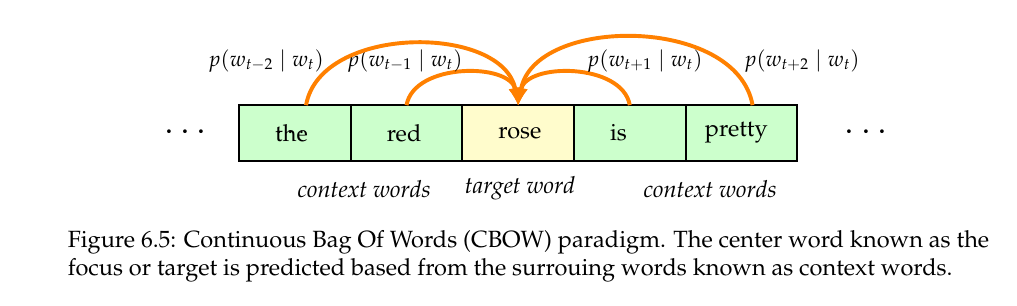

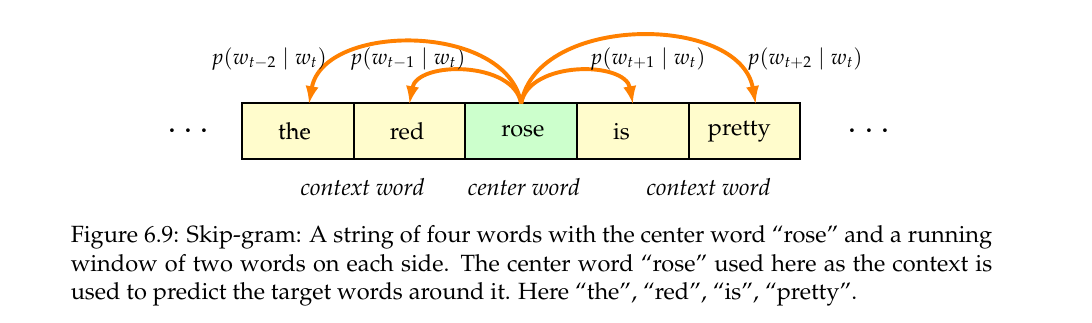

Tenemos una ventana (running window) para predecir la palabra del centro (targe) basados en las palabras anteriores y posteriores (contexto).
Esto lo vamos a llevar a una red neuronal. El modelo para obtener la primera hipotesis es de la forma


La red neuronal se dibuja a continuacion:


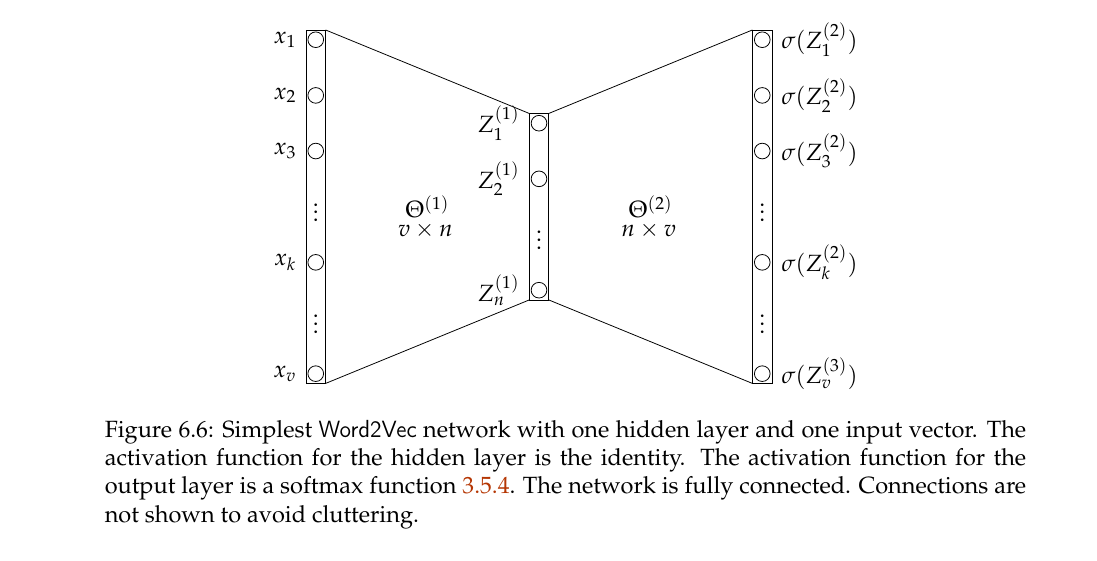

Pensamos que cada palabra inicialmente se codifica como un "one-hot-encoding". Esto es la entrada de la red. SE quiere hallar
un espacio $\Theta^{(1)} \in \mathbb{R}^{v \times n}$, donde
$v$ es el tamanho del vocabulario y $n$ la  dimension del espacio donde se van a embeber las palabras.

El vector (parametro) $\Theta^{(1)}$ se puede representar como

$$\Theta^{(1)} = \begin{pmatrix} w_1 \\ w_2 \\ \vdots \\ w_v \end{pmatrix}  $$

Este es el objetivo de la red.

Hay muchos sitios donde esta desarrollado el codigo para Word2Vec

* [Word2Vec](https://code.google.com/archive/p/word2vec/)

Implementacion en Python

* [GENSIM](https://radimrehurek.com/gensim/models/word2vec.html)
muestra implementacion usando rutinas en C optimizadas.

* El mismo TensorFlow/Keras ya tiene estos algoritmos implementados (Pytorch y demas)

* Por ultimo una herramienta para "jugar".

[wevi](https://ronxin.github.io/wevi/)



